# Classification - k-nearest-neighbors - Major Occupation

In [1]:
# Import feature subset with Major_Occupation Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd

originalDF = pd.read_csv('occupationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE.fillna(0, inplace=True)

X = dfOHE

#separate target values
y = originalDF['Major_Occupation']

#originalFeatureSubset['CLUSTERS'] = pd.Series(labels, index=originalFeatureSubset.index)

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=8)

# fit the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

With knn, you can determine membership probabilities for each of the 3 labels. As you can see, the predict() function just picks the most likely label.

In [2]:
# What kind of occupation has years on internet (1-3), web ordering (yes),Not_Purchasing_Security, age(35) 
# call the "predict" method:
result = knn.predict([[1,0,0,0,0,1,0,0,0,0,0,0,1,35],])

print(result)

['Computer']


In [3]:
knn.predict_proba([[1,0,0,0,0,1,0,0,0,0,0,0,1,35],]) 

array([[0.375, 0.25 , 0.   , 0.125, 0.25 ]])

In the next block of code, we take each pair of predictors and use the k-nearest-neighbour algorithm with k=3,5,7. 

Plotting file pic/k_3_nearest-neighbours_Occupation_YearsOnInternet0_YearsOnInternet1.pdf


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = 0        Professional
1           Education
2            Computer
3        Professional
4           Education
5        Professional
6               Other
7        Professional
8               Other
9               Other
10           Computer
11         Management
12          Education
13           Computer
14              Other
15              Other
16          Education
17       Professional
18          Education
19              Other
20              Other
21          Education
22           Computer
23           Computer
24              Other
25              Other
26       Professional
27              Other
28              Other
29       Professional
             ...     
10078      Management
10079    Professional
10080           Other
10081        Computer
10082        Computer
10083        Computer
10084        Computer
10085    Professional
10086           Other
10087    Professional
10088           Other
10089    Professional
10090        Computer
10091       Education
10092           Other
10093    Professional
10094      Management
10095        Computer
10096    Professional
10097        Computer
10098           Other
10099      Management
10100    Professional
10101        Computer
10102      Management
10103       Education
10104        Computer
10105      Management
10106        Computer
10107           Other
Name: Major_Occupation, Length: 10108, dtype: object.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1c30ce18> (for post_execute):


TypeError: iteration over a 0-d array

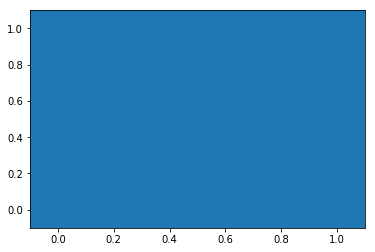

In [16]:
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string

import sys
sys.path.append('../resources')
from w6support import plot_2d_class

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

#predNames = list(iris.data) # https://stackoverflow.com/a/19483025, except iris.data is an array, not a dataframe
predNames = list(dfOHE.columns.values)

df=pd.DataFrame(dfOHE, columns=predNames)
nTrain = df.shape[0]
y = originalDF['Major_Occupation']

pattern = re.compile('[\W_]+', re.UNICODE) # https://stackoverflow.com/a/1277047
for neighborCnt in range(3,8,2): # from 3 to a maximum of 8, in steps of 2, so 3,5,7
  knn = neighbors.KNeighborsClassifier(n_neighbors=neighborCnt)
  for twoCols in itertools.combinations(predNames, 2): # https://stackoverflow.com/a/374645
    X = df[list(twoCols)]  # we only take two features at a time
    colNames = X.columns
    c1 = colNames[:1][0] # first of 2
    c2 = colNames[-1:][0] # last of 2
    c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
    c2 = pattern.sub("",c2.title())
    knn.fit(X, y)
    plotTitle = "k = %i %s fit to the %s dataset" % (neighborCnt, "nearest-neighbours", "Occupation")
    fileTitle = "pic/k_%i_%s_%s_%s_%s.pdf" % (neighborCnt, "nearest-neighbours", "Occupation", c1, c2)
    print("Plotting file %s" % (fileTitle))
    plot_2d_class(X, y, nTrain, knn, plotTitle, fileTitle, cmap_light, cmap_bold)


## Model Validation

The k-nearest-neighbours classification "model" should be validated. Clearly, the parameter $k$ is critical to its performance. Generally, smaller values of $k$ fit the training set more accurately (less bias) but generalise less well to test data (more variance). The opposite applies to larger values of $k$.

With $k$ set to its minimum value ($k = 1$), it fits the training set exactly and the confusion matrix is optimal:

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X, y = dfOHE, originalDF['Major_Occupation']
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(X, y)
y_pred1 = knn1.predict(X)
print(np.all(y == y_pred1))

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y, y_pred1))

False
Accuracy: 0.45330431341511673


The *confusion matrix* highlights where classification differences arise, as these occur on the off-diagognal elements of the matrix:

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y, y_pred1, digits=3))

0.45330431341511673
[[1245  308  147  222  163]
 [ 498 1462   70  202  107]
 [ 376  122  206  340  138]
 [ 346  269  172 1292  260]
 [ 724  253  195  614  377]]
              precision    recall  f1-score   support

    Computer      0.390     0.597     0.472      2085
   Education      0.606     0.625     0.615      2339
  Management      0.261     0.174     0.209      1182
       Other      0.484     0.552     0.516      2339
Professional      0.361     0.174     0.235      2163

   micro avg      0.453     0.453     0.453     10108
   macro avg      0.420     0.425     0.409     10108
weighted avg      0.440     0.453     0.434     10108



All 50 training samples for each class are identified correctly, as expected when $k = 1$ (accuracy score is 1, off-diagonal terms are 0, the classification report (relative to the trsining set) is "too good to be true"...

Note:

1. The _Recall_ of the $i^{\mbox{th}}$ predictor is $R_i \equiv c_{ii} / \sum_j c_{ij}$, which is the ratio of the $i^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _column_.
2. The _Precision_ of the $j^{\mbox{th}}$ predictor is $P_j \equiv c_{jj} / \sum_i c_{ij}$, which is the ratio of the $j^{\mbox{th}}$ diagonal element to the sum of the elements of the confusion matrix $C = \{c_{ij}\}$ in that _row_.
3. $F_1$-score is defined as $F_1 = 2\frac{R_i P_i}{R_i + P_i}$.

To test how the model generalizes to the training set, we hold back some of the training data by splitting the training data into a _training set_ and a _testing set_. We hold back 20% and stratify based on the data labels $y$, so each of the row counts in the confusion matrix should be $0.2 * 50 = 10$.

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y)
knn1.fit(Xtrain, ytrain)
ypred1s = knn1.predict(Xtest)
print(accuracy_score(ytest, ypred1s))
print(confusion_matrix(ytest, ypred1s))
print(classification_report(ytest, ypred1s, digits=3))

0.4124629080118694
[[325 103  48  69  80]
 [140 413  22  88  39]
 [104  38  38 117  58]
 [110  64  62 367  99]
 [222  62  48 209 108]]
              precision    recall  f1-score   support

    Computer      0.361     0.520     0.426       625
   Education      0.607     0.588     0.598       702
  Management      0.174     0.107     0.133       355
       Other      0.432     0.523     0.473       702
Professional      0.281     0.166     0.209       649

   micro avg      0.412     0.412     0.412      3033
   macro avg      0.371     0.381     0.368      3033
weighted avg      0.395     0.412     0.396      3033



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

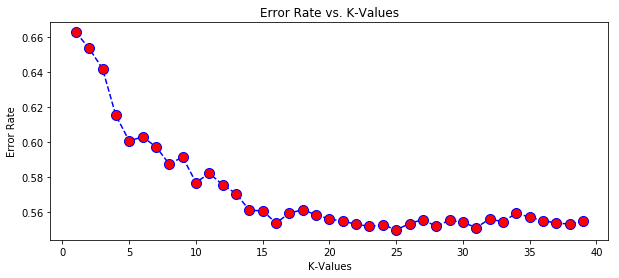

In [33]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Note the confusion (off-diagonal nonzero elements) between Iris species 2 and species 3. For comparison, we look at the confusion matrix when $k = 3$. Firstly, we try with all the training data (not holding any observations back for a test set).

In [34]:
knn3 = KNeighborsClassifier(n_neighbors=15)
knn3.fit(X, y)
y_pred3 = knn3.predict(X)
print(accuracy_score(y, y_pred3))
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3, digits=3))

0.4747724574594381
[[1222  255  117  221  270]
 [ 399 1458   75  252  155]
 [ 357   71  159  403  192]
 [ 261  187  125 1466  300]
 [ 644  168  154  703  494]]
              precision    recall  f1-score   support

    Computer      0.424     0.586     0.492      2085
   Education      0.682     0.623     0.651      2339
  Management      0.252     0.135     0.175      1182
       Other      0.481     0.627     0.545      2339
Professional      0.350     0.228     0.276      2163

   micro avg      0.475     0.475     0.475     10108
   macro avg      0.438     0.440     0.428     10108
weighted avg      0.461     0.475     0.458     10108



Note that 6 observations (3 each of species 2 and 3) are not classified the same as the human experts. However, this might also indicate something interesting about those observations. They could be outliers (not classified correctly) but, at the very least, they are extreme observations.

Now we try holding back 20% of the training set for use as test observations, leaving 80% of the training data to train the classifier. We then look at what happens to the confusion matrix. Note that sampling the data like this could result in *better* relative performance, depending on what happens to the 6 problematic observations.

In [29]:
knn3.fit(Xtrain, ytrain)
ypred3s = knn3.predict(Xtest)
print(accuracy_score(ytest, ypred3s))
print(confusion_matrix(ytest, ypred3s))
print(classification_report(ytest, ypred3s, digits=3))

0.3580613254203759
[[301 113  49  62 100]
 [181 386  20  46  69]
 [133  54  45  74  49]
 [116 103 103 265 115]
 [247  95  82 136  89]]
              precision    recall  f1-score   support

    Computer      0.308     0.482     0.376       625
   Education      0.514     0.550     0.531       702
  Management      0.151     0.127     0.138       355
       Other      0.455     0.377     0.412       702
Professional      0.211     0.137     0.166       649

   micro avg      0.358     0.358     0.358      3033
   macro avg      0.328     0.335     0.325      3033
weighted avg      0.350     0.358     0.347      3033

